In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import os

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", noise=0.5, replicates = 3)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test2", noise=0.5, replicates = 3)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test3", noise=0.5, replicates = 3, time_step=1)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test4", noise=0.5, replicates = 3, time_step=1)
df = df.append(df2, ignore_index=True)

These data can be exported to either excel or csv format

In [3]:
#file_parser.export(df,os.path.join("test_data","independent_data.xlsx"))

In [4]:
#file_parser.export_csv(df,os.path.join("test_data","independent_data.csv"))

In [5]:
df = file_parser.read_excel(os.path.join("test_data","data.xlsx"))

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

In [6]:
df_results = cosinor.fit_group(df, n_components = [1,2,3], period=24, plot=False) #folder=""

Get the best fitting periods with criterium 'RSS' (```reverse=False``` means lower is better)

In [7]:
df_best_fits = cosinor.get_best_fits(df_results, n_components = [1,2,3], criterium='RSS', reverse = False)
df_best_fits

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,1.694089e-01,2.541134e-01,11.512154,0.784755,0.778776,-36.142211,1.039764,0.150947,0.002031,[23.423423423423426],[1.0417527895534135],[11.411411411411413],[-1.0376503623054327],0.797114,0.399864
1,test1,24.0,2.0,1.110223e-16,1.480297e-16,1.021567e-01,2.043134e-01,11.387176,0.787092,0.774926,-35.732880,1.047858,0.255772,-0.020210,[23.023023023023026],[1.0276325302218887],[11.811811811811813],[-1.0680687802692428],0.804413,0.403329
2,test1,24.0,3.0,1.110223e-16,1.480297e-16,1.541825e-01,2.541134e-01,10.745646,0.799087,0.781359,-33.558362,1.074762,0.517833,0.021674,[22.022022022022025],[1.0964102096839057],[10.51051051051051],[-1.0530889528437992],0.793244,0.397523
3,test2,24.0,1.0,2.220446e-16,2.664535e-16,2.477270e-01,3.303027e-01,19.738163,0.631150,0.620904,-56.360359,0.932110,3.086036,-0.022534,[12.212212212212213],[0.909543628170932],[0.2002002002002002],[-0.9546338325238869],1.043747,0.523585
4,test2,24.0,2.0,3.441691e-15,3.754572e-15,3.050343e-01,3.660411e-01,18.871758,0.647341,0.627189,-54.677081,0.974877,-2.987501,0.044050,[11.411411411411413],[1.0188907403269165],[1.4014014014014016],[-0.9307801583587405],1.035565,0.519227
5,test2,24.0,3.0,2.331468e-14,2.331468e-14,3.976676e-01,4.338192e-01,18.000502,0.663622,0.633942,-52.904573,0.944199,-2.673027,0.008264,[10.21021021021021],[0.9524627647822834],[2.802802802802803],[-0.9359344148537028],1.026675,0.514503
6,test3,24.0,1.0,1.110223e-16,1.480297e-16,2.734479e-13,1.640688e-12,66.223643,0.518810,0.512127,-149.975429,0.976145,-0.052412,-0.000464,[0.2002002002002002],[0.9756393977843096],[12.212212212212213],[-0.9765331583700944],1.340413,0.678149
7,test3,24.0,2.0,1.110223e-16,1.480297e-16,3.037484e-05,9.112452e-05,44.880162,0.673895,0.664709,-121.380866,1.121927,-0.026206,0.356556,[0.1001001001001001],[1.4782516162182213],"[7.907907907907909, 16.416416416416418]","[-0.751810841497804, -0.7652736478040391]",1.111343,0.562190
8,test3,24.0,3.0,1.110223e-16,1.480297e-16,5.402881e-02,1.296691e-01,36.586735,0.734156,0.722763,-106.364072,1.276843,-0.052412,0.503533,[0.2002002002002002],[1.7803386532554812],"[6.106106106106107, 12.412412412412413, 18.218...","[-0.5691918677907137, -0.7732614633253607, -0....",1.010686,0.511208
9,test4,24.0,1.0,1.110223e-16,1.480297e-16,3.985701e-14,4.782841e-13,57.213312,0.600590,0.595042,-139.225984,1.071631,-3.039913,-0.042529,[11.611611611611613],[1.0290544729827293],[23.623623623623626],[-1.1141359081211701],1.245893,0.630329


or get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is p-value)

In [8]:
df_best_models = cosinor.get_best_models(df, df_results, n_components = [1,2,3])

... and plot these models (together with qq-plots and phase diagrams).

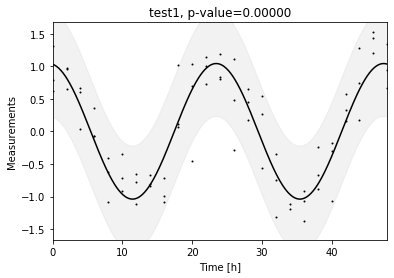

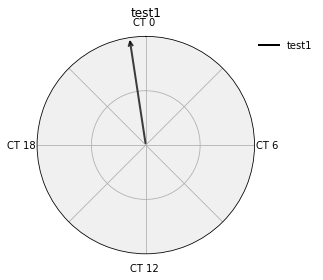

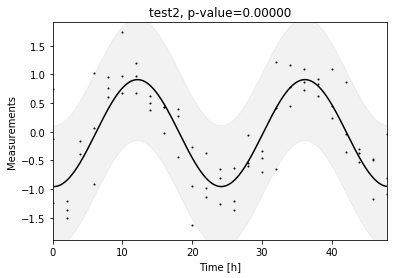

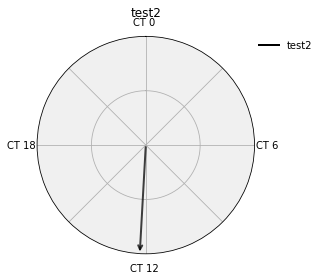

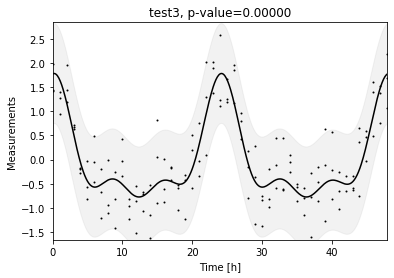

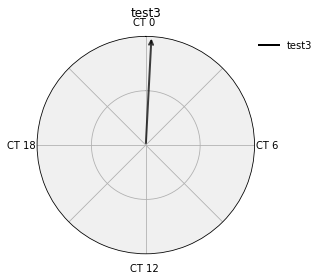

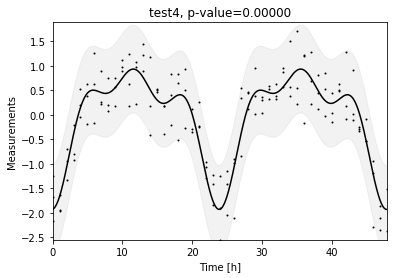

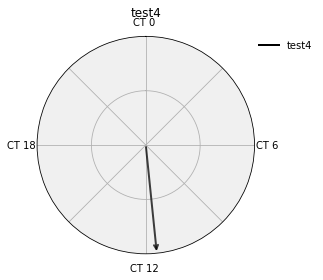

In [9]:
cosinor.plot_df_models(df, df_best_models)

Display the results or store the results as a csv file:

In [10]:
df_best_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,11.512154,0.784755,0.778776,-36.142211,1.039764,0.150947,0.002031,[23.423423423423426],[1.0417527895534135],[11.411411411411413],[-1.0376503623054327],0.797114,0.399864
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,19.738163,0.631150,0.620904,-56.360359,0.932110,3.086036,-0.022534,[12.212212212212213],[0.909543628170932],[0.2002002002002002],[-0.9546338325238869],1.043747,0.523585
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,36.586735,0.734156,0.722763,-106.364072,1.276843,-0.052412,0.503533,[0.2002002002002002],[1.7803386532554812],"[6.106106106106107, 12.412412412412413, 18.218...","[-0.5691918677907137, -0.7732614633253607, -0....",1.010686,0.511208
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,27.473154,0.808208,0.799988,-85.308054,1.431859,-3.039913,-0.497420,"[5.805805805805806, 11.611611611611613, 18.318...","[0.5042794404234394, 0.9343248864017997, 0.410...",[23.923923923923926],[-1.92895629375945],0.875808,0.442986


### Extended analyses using a multi-component cosinor model
Analyse the best models with sampling of confidence intervals of regression coefficients.

In [11]:
df_results_extended = cosinor.analyse_best_models(df, df_best_models, analysis="CI")
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase),mesor,CI(mesor),p(mesor),q(mesor)
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,1.039764,0.150947,"[0.8900871253692448, 1.1894408358928692]",0.000000e+00,0.000000e+00,"[-0.006289474781962845, 0.30818426431611545]",0.059631,0.079508,0.002031,"[-0.09007351737659364, 0.09413481482621422]",9.650655e-01,0.965066
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,0.932110,3.086036,"[0.7477555373266069, 1.116463727216325]",1.998401e-15,1.998401e-15,"[2.8763864669504136, 3.2956847857478513]",0.000000,0.000000,-0.022534,"[-0.14321112798958668, 0.09814243212987028]",7.108034e-01,0.947738
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,1.276843,-0.052412,"[1.0312880512906726, 1.522398829331372]",0.000000e+00,0.000000e+00,"[-0.18344301447387856, 0.07861843477451913]",0.430386,0.430386,0.503533,"[0.29250900096025956, 0.7145566853326186]",5.715751e-06,0.000011
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,1.431859,-3.039913,"[1.215615625013616, 1.6481016097794448]",0.000000e+00,0.000000e+00,"[-5.968711568081509, -0.11111405448132139]",0.042027,0.079508,-0.497420,"[-0.684624149247697, -0.31021563886491177]",5.443855e-07,0.000002


Or using bootstrap:

In [12]:
df_results_extended = cosinor.analyse_best_models(df, df_best_models, analysis="bootstrap")
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase),mesor,CI(mesor),p(mesor),q(mesor)
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,1.039764,0.150947,"[0.927318631611974, 1.1613261481205317]",0.0,0.0,"[0.0024547584064777417, 0.2868545142383439]",0.049958,0.066611,0.002031,"[-0.08789048416691528, 0.0919306058443238]",9.649974e-01,9.649974e-01
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,0.932110,3.086036,"[0.7864291622433335, 1.0889448340292234]",0.0,0.0,"[2.8975864662158095, 3.2914286443926413]",0.000000,0.000000,-0.022534,"[-0.13829682636569632, 0.09424902928163095]",7.115382e-01,9.487177e-01
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,1.276843,-0.052412,"[1.1584351236082178, 1.4246289937138772]",0.0,0.0,"[-0.12853720669699026, 0.01791804669014714]",0.141011,0.141011,0.503533,"[0.37176654697324674, 0.6122579991759062]",3.803624e-13,1.521450e-12
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,1.431859,-3.039913,"[1.2838305177439708, 1.592075823245072]",0.0,0.0,"[-3.2361239114059686, -2.8208991646454704]",0.000000,0.000000,-0.497420,"[-0.6273238619005227, -0.36273958375447357]",1.638267e-11,3.276535e-11


## Cosinor1 analysis

Only 1-component model can be used, but statistics is different in the background...

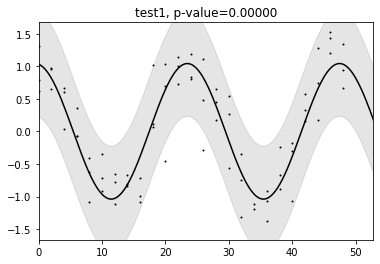

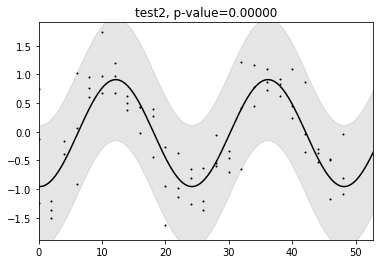

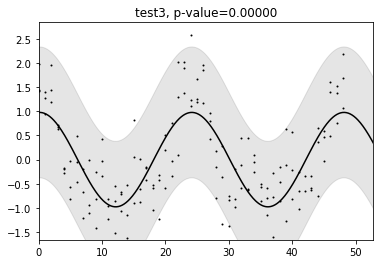

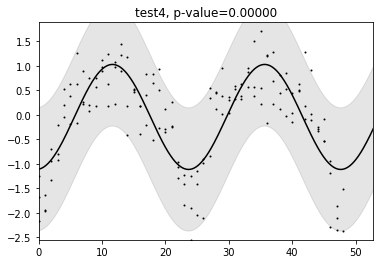

In [13]:
df_results = cosinor1.fit_group(df, period=[24])

## Comparison analysis

Define the pairs to compare

In [14]:
pairs = (["test1", "test2"],["test3", "test4"])

### Comparison using cosinor1


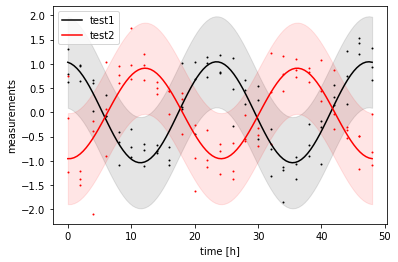

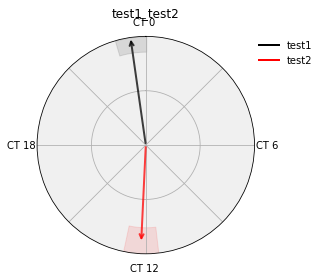

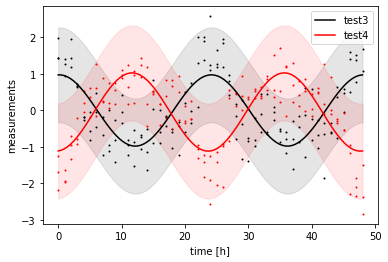

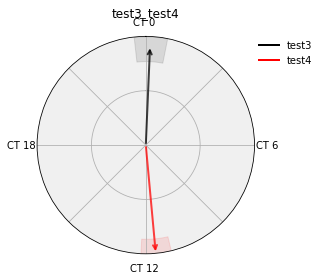

In [15]:
#compare_cosinor1 = cosinor1.test_cosinor_pairs(df, pairs, period=24, folder='paper' )
compare_cosinor1 = cosinor1.test_cosinor_pairs(df, pairs, period=24)

In [16]:
compare_cosinor1[["test", "q(d_amplitude)", "q(d_acrophase)"]]

,test,q(d_amplitude),q(d_acrophase)
0,test1 vs. test2,0.372013,1.164985e-153
1,test3 vs. test4,0.372013,9.622936e-174


### Comparison using a multi-component cosinor model

Use an 1-component cosinor for the first pair

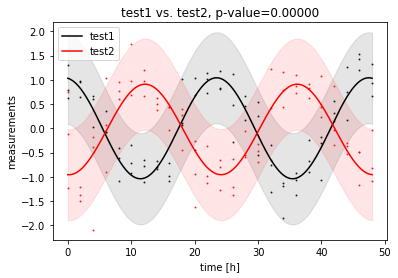

In [17]:
df_cosinor_lm1 = cosinor.compare_pairs_limo(df, pairs[:1], n_components = 1, period = 24)#, folder = 'results\\test_limo_tester\\')

In [18]:
df_cosinor_lm1

,test,period,n_components,d_amplitude,d_acrophase,p,q,p params,q params,p(F test),q(F test)
0,test1 vs. test2,24,1,-0.107655,2.943474,7.112734e-37,7.112734e-37,5.180330e-40,5.180330e-40,1.110223e-16,1.110223e-16


Use a 3-component cosinor for second pair

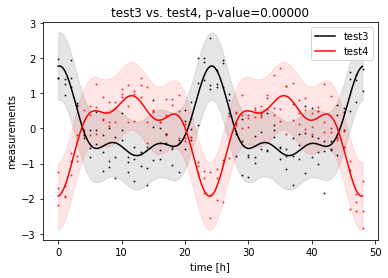

In [19]:
df_cosinor_lm2 = cosinor.compare_pairs_limo(df, pairs[1:], n_components = 3, period = 24)#, folder = 'results\\test_limo_tester\\')

In [20]:
df_cosinor_lm2

,test,period,n_components,d_amplitude,d_acrophase,p,q,p params,q params,p(F test),q(F test)
0,test3 vs. test4,24,3,0.155029,-2.981211,6.414126e-82,6.414126e-82,4.208287e-74,4.208287e-74,1.110223e-16,1.110223e-16


### Extended analyses using a multi-component cosinor model

To get more informative results we can use an extended comparison using bootstrapping or sampling of regression coefficients confidence intervals.

#### This can be performed on the basis of the best models for each test...

You can do the analysis with the sampling of confidence intervals:

In [21]:
df_cosinor_lm = cosinor.compare_pairs_best_models(df, df_best_models, pairs, analysis="CI")
df_cosinor_lm

,test,period1,n_components1,period2,n_components2,d_amplitude,d_acrophase,p1,p2,q1,...,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24.0,1.0,24.0,1.0,-0.107654,2.935088,1.110223e-16,2.220446e-16,1.110223e-16,...,"[-0.4389948453060355, 0.22368614858685332]",0.521764,0.521764,"[2.568202202634298, 3.301974260529814]",0.000000,0.000000,-0.024565,"[-0.23718741026769274, 0.18805741695835576]",0.819690,0.819690
1,test3 vs. test4,24.0,3.0,24.0,3.0,0.155015,-2.987501,1.110223e-16,1.110223e-16,1.110223e-16,...,"[-0.29375226243153363, 0.60378261660255]",0.497093,0.521764,"[-4.661549059230501, -1.3134519836329697]",0.000517,0.000517,-1.000953,"[-1.3971241276347097, -0.6047813467707776]",0.000001,0.000002


Or using bootstrap:

In [22]:
df_cosinor_lm = cosinor.compare_pairs_best_models(df, df_best_models, pairs, analysis="bootstrap")
df_cosinor_lm

,test,period1,n_components1,period2,n_components2,d_amplitude,d_acrophase,p1,p2,q1,...,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24.0,1.0,24.0,1.0,-0.107654,2.935088,1.110223e-16,2.220446e-16,1.110223e-16,...,"[-0.373679039895789, 0.1583703431766068]",0.428984,0.428984,"[2.6019913879916596, 3.2681850751724526]",0.0,0.0,-0.024565,"[-0.23324098162777995, 0.18411098831844297]",8.178536e-01,8.178536e-01
1,test3 vs. test4,24.0,3.0,24.0,3.0,0.155015,-2.987501,1.110223e-16,1.110223e-16,1.110223e-16,...,"[-0.1374788345750444, 0.4475091887460607]",0.299815,0.428984,"[-3.3166090224947156, -2.658392020368755]",0.0,0.0,-1.000953,"[-1.2609866674823134, -0.7409188069231739]",6.379341e-13,1.275868e-12


#### You can also choose to use the same type of a cosinor model for each comparison (namely, the same number of components and period)

Using sampling of confidence intervals...

In [23]:
df_cosinor_lm = cosinor.compare_pairs(df, pairs, n_components = 1, period=24, analysis="CI")

In [24]:
df_cosinor_lm

,test,period,n_components,d_amplitude,d_acrophase,p1,p2,q1,q2,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24,1,-0.107654,2.935088,1.110223e-16,2.220446e-16,1.110223e-16,2.220446e-16,"[-0.4377342152871977, 0.2224255185680155]",0.520178,0.566725,"[2.5944083475591375, 3.2757681156049747]",0.0,0.0,-0.024565,"[-0.2372726765344102, 0.18814268322507322]",0.819761,0.819761
1,test3 vs. test4,24,1,0.095486,-2.987501,1.110223e-16,1.110223e-16,1.110223e-16,2.220446e-16,"[-0.23219517823000402, 0.42316719489238874]",0.566725,0.566725,"[-3.328180405454652, -2.6468206374088186]",0.0,0.0,-0.042064,"[-0.25526249362159925, 0.17113385765549527]",0.698054,0.819761


... or bootstrap

In [25]:
df_cosinor_lm = cosinor.compare_pairs(df, pairs, n_components = 1, period=24, analysis="bootstrap")

In [26]:
df_cosinor_lm

,test,period,n_components,d_amplitude,d_acrophase,p1,p2,q1,q2,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24,1,-0.107654,2.935088,1.110223e-16,2.220446e-16,1.110223e-16,2.220446e-16,"[-0.3676409352948059, 0.15233223857562372]",0.418366,0.512704,"[2.610130136009095, 3.2600463271550173]",0.0,0.0,-0.024565,"[-0.2312230088103398, 0.18209301550100282]",0.816107,0.816107
1,test3 vs. test4,24,1,0.095486,-2.987501,1.110223e-16,1.110223e-16,1.110223e-16,2.220446e-16,"[-0.1900487538779586, 0.38102077054034333]",0.512704,0.512704,"[-3.2905084554600585, -2.6844925874034122]",0.0,0.0,-0.042064,"[-0.2532785125024304, 0.1691498765363264]",0.696571,0.816107
